## Problem Statement
According to the soil and climate conditions, we need to identify which different types of crops we can grow in those conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('farmer.csv')

In [62]:
df.head()  

# N -> Nitrogen
# P -> Phoshorus
# K -> Potassium

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [63]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [64]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [67]:
x = df.drop('label', axis=1)

In [68]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


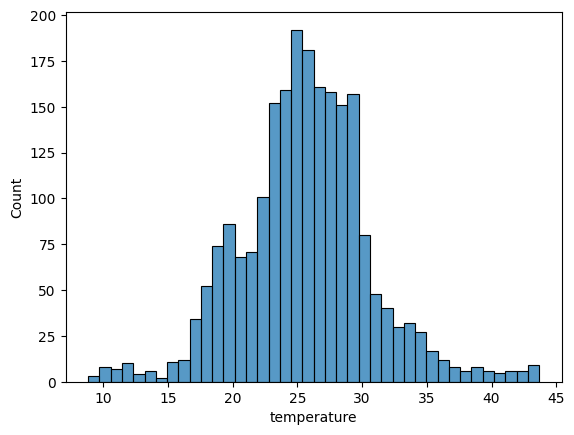

In [69]:
sns.histplot(x='temperature', data=x)
plt.show()

The kde plot shows a bell curve. Thus it is a normal distribution. 
It must be noted that before clustering, we need to normalize our data

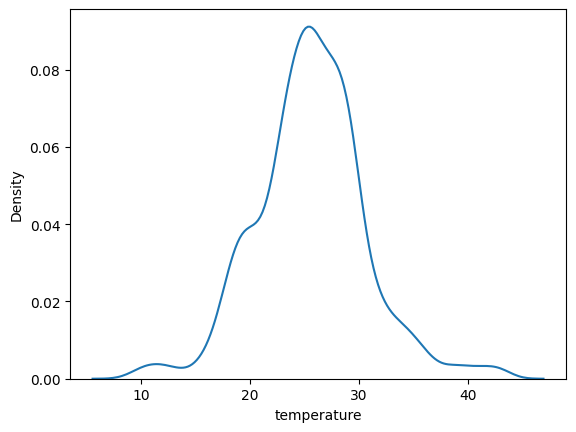

In [70]:
sns.kdeplot(x='temperature', data=x)
plt.show()

For normalization technique, we use standard normalization

X new = (Xi -Xmean) / (Standard Deviation)

Standard Deviation :

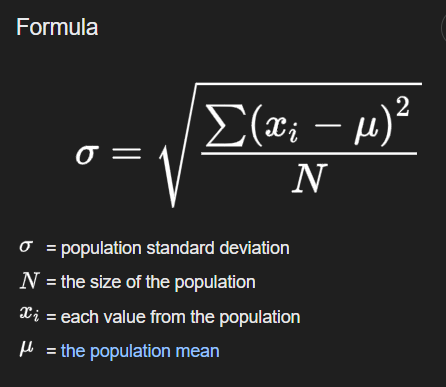

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
std = StandardScaler()

In [73]:
x2 = x.values

In [74]:
x2[0]

array([ 90.        ,  42.        ,  43.        ,  20.87974371,
        82.00274423,   6.50298529, 202.9355362 ])

In [75]:
x_transformed = std.fit_transform(x2)

In [76]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

The data is now transformed. The average of evry column is  now zero. The standard deviation of every column is one.

In [77]:
a = pd.DataFrame(x_transformed)

In [78]:
a

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [79]:
a.describe()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,-1.564454e-01
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.817982e-01,8.296508e-01,5.869540e-01,3.786243e-01
max,2.423483e+00,2.778707e+00,3.097591e+00,3.567190e+00,1.280400e+00,4.478912e+00,3.550701e+00


In [80]:
print(a[0].mean())  # this in encoded form

-1.0335167065601457e-16


In [81]:
format(a[0].mean(), '.20f')  # this is in decode form, the average of every column is zero

'-0.00000000000000010335'

In [82]:
print(a[0].std())  # the standard deviation of every column is one

1.0002273502359715


For grouping the data, we calculate distance between the data points plotted in a scatter plot. The Euclidian  Distance Formula is used for calculating distance.
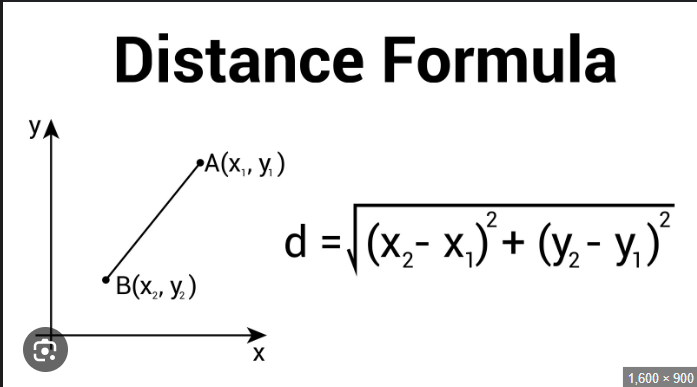

This formula is used in backend for K-Means algorithm

In [83]:
from sklearn.cluster import KMeans

In [84]:
km = KMeans(n_clusters=10)

In [85]:
km.fit(x_transformed)

KMeans(n_clusters=10)

In [86]:
km.labels_

array([4, 4, 4, ..., 4, 6, 6], dtype=int32)

In [87]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [88]:
df['group'] = km.labels_

In [89]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,group
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,4
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,4
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,4
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,4
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,4
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,4
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,6
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,4
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,6


In [90]:
df['group'].value_counts()

group
7    405
5    302
4    269
6    247
2    200
0    200
8    187
9    178
1    107
3    105
Name: count, dtype: int64

In [91]:
fourth_grp = df[df['group']==4]

In [92]:
fourth_grp['label'].value_counts()

label
rice          100
jute          100
coffee         53
papaya         13
pigeonpeas      3
Name: count, dtype: int64

In [93]:
sixth_grp = df[df['group'] == 6]

In [94]:
sixth_grp['label'].value_counts()

label
maize     99
cotton    99
coffee    47
papaya     2
Name: count, dtype: int64

In [95]:
wcss = []
for i in range(5,50):
    km = KMeans(n_clusters=i)
    km.fit(x_transformed)
    wcss.append(km.inertia_)

WCSS is the avg distance of all points in  a cluster from the centroid of that cluster

While training algorithms, the WCSS should be minimum. Low value of WCSS means that the cluster is small and the data points are near to centroid. The nearer they are to centroid, the more they are suitable for that cluster

In [96]:
wcss  # wcss -> within a cluster sum of squares
clusters = list(range(5,50))
clusters

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

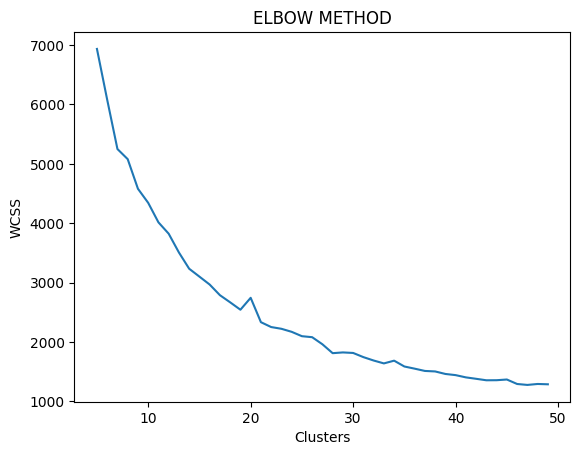

In [97]:
sns.lineplot(x=clusters, y=wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In elbow method, we find the elbow point of our graph

As the number of clusters increases, the WCSS value decreases

From the graph using elbow method, we have determined that the the number of cluster required are 15. Thus, we train are algo again for 15 clusters

In [98]:
km = KMeans(n_clusters=15)

In [99]:
km.fit(x_transformed)

KMeans(n_clusters=15)

In [100]:
km.labels_

array([1, 1, 1, ..., 1, 4, 1], dtype=int32)

In [101]:
x_transformed.shape

(2200, 7)

In [102]:
df['group_15'] = km.labels_

In [103]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,group,group_15
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,4,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,4,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,4,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,4,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,4,1
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,4,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,6,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,4,1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,6,4


In [104]:
df['group_15'].value_counts()

group_15
4     514
1     294
2     225
11    156
6     152
5     136
13    114
12    108
8     106
7      95
3      89
9      71
14     54
0      44
10     42
Name: count, dtype: int64

In [105]:
def find_label(grp_no):
    grp = df[df['group_15'] == grp_no]
    return list(grp['label'].value_counts().keys())

In [106]:
find_label(7)

['chickpea']

In [107]:
find_label(10)

['mothbeans']

In [108]:
import joblib

In [109]:
joblib.dump(km,'kmeans_model.lb')

['kmeans_model.lb']

In [110]:
joblib.dump(std,'standard_scaler.lb')

['standard_scaler.lb']

In [111]:
df.to_csv('data_to_be_filter.csv', index = False)

In [112]:
km.predict([[ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ]])

array([1], dtype=int32)

In [113]:
x_transformed[0]


array([ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ])

In [114]:
pred = km.predict([[ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ]])

In [115]:
find_label(pred[0])

['jute', 'rice', 'coffee', 'papaya', 'pigeonpeas']

In [116]:
x_transformed[0]

array([ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ])

In [117]:
pred = km.predict([x_transformed[0]])

In [118]:
find_label(pred[0])

['jute', 'rice', 'coffee', 'papaya', 'pigeonpeas']